<a href="https://colab.research.google.com/github/KaveeshaChan/SDGP-SE-37/blob/sandesi/Detectron2DamageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-o5q31ooo
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-o5q31ooo
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375550 sha256=a998bfc0a32cbea1ea3d53d68c3cb9646556ec59a02857eb5c4aacc937e066ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-mm15rrvd/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7


In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

In [ ]:
# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

In [ ]:
# I am visualizing some images in the 'val/' directory

dataDir='/content/drive/MyDrive/CarDamageDataset/archive/val'
dataType='COCO_val_annos'
mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir = "/content/drive/MyDrive/CarDamageDataset/archive/img"

In [ ]:
# initialize coco api for instance annotations
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!
loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


In [ ]:
 #display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );

In [ ]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

0 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [ ]:
# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '1.jpg', 'flickr_url': '', 'height': 1024, 'id': 0, 'license': 1, 'width': 1024}


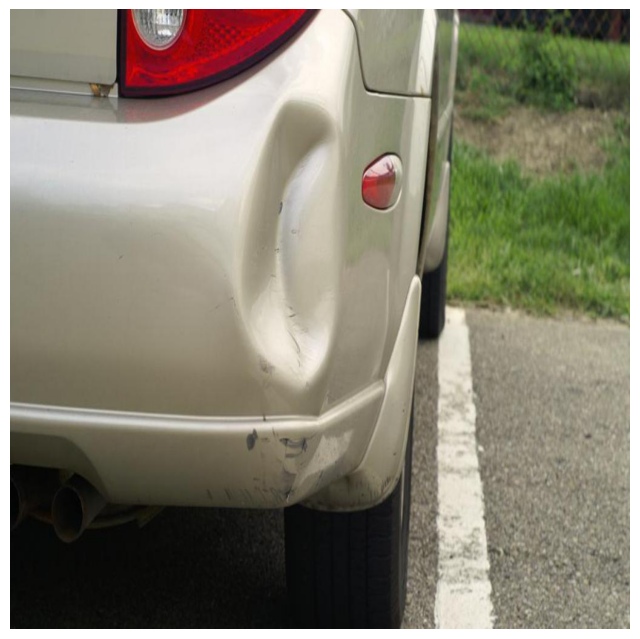

In [ ]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)

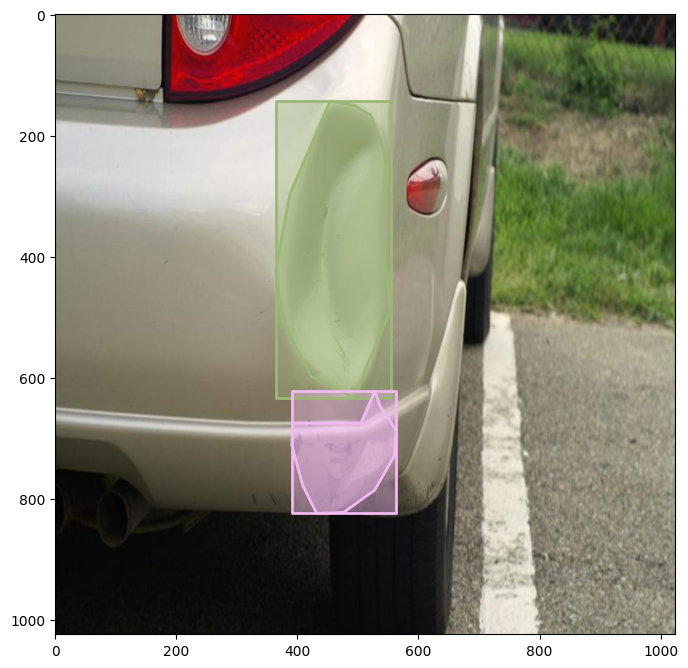

In [ ]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

In [ ]:
#get parts annotations
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [ ]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [ ]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['headlamp', 'rear_bumper']


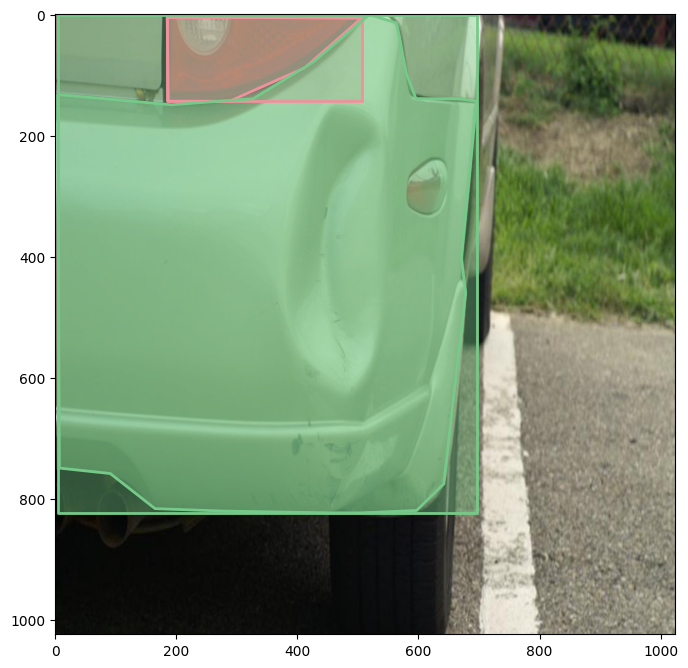

In [ ]:
#Create a list of parts in the image
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts)

#Plot Parts
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )

Damaged parts are: ['headlamp', 'headlamp']


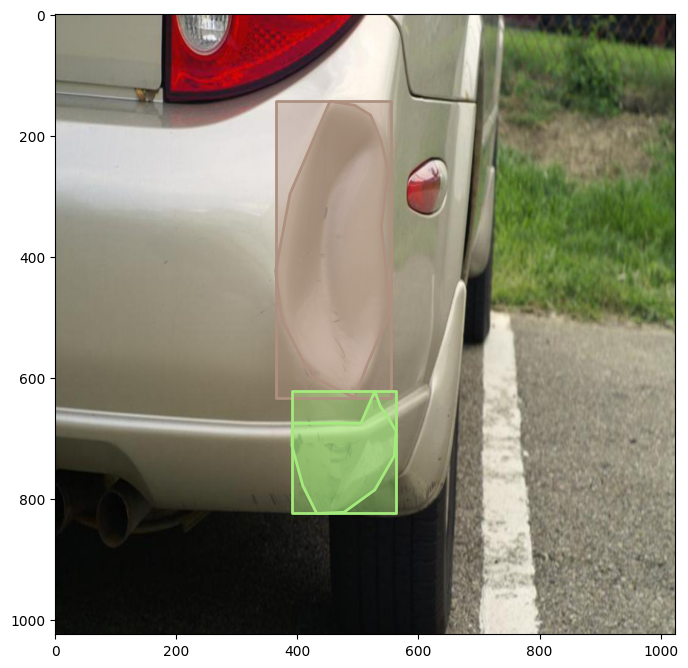

In [ ]:
# Filter annotations related to damaged parts
damaged_anns = [ann for ann in anns if ann['category_id'] in catIds]

# Determine the damaged part of the vehicle
damaged_parts = [category_map[ann['category_id']] for ann in damaged_anns]

# Print the damaged parts
print("Damaged parts are:", damaged_parts)

# Plot damages on the image
plt.imshow(I)
plt.axis('on')
coco.showAnns(damaged_anns, draw_bbox=True)

# Note: If you want to identify the specific damaged region (e.g., front, rear, side),
# you might need additional logic based on the bounding box coordinates or segmentation masks.


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data for demonstration
np.random.seed(0)
num_samples = 1000

# Assume three features: area of damage, severity of damage, and labor hours
area_of_damage = np.random.uniform(10, 100, num_samples)  # Random area in square inches
severity_of_damage = np.random.uniform(1, 10, num_samples)  # Random severity level
labor_hours = np.random.uniform(1, 10, num_samples)  # Random labor hours required for repair

# Generate synthetic repair costs based on the features with some noise
repair_cost = 100 * area_of_damage + 50 * severity_of_damage + 20 * labor_hours + np.random.normal(0, 100, num_samples)

# Stack features into a feature matrix
X = np.column_stack((area_of_damage, severity_of_damage, labor_hours))

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, repair_cost, test_size=0.2, random_state=42)

# Train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict repair costs for test data
predicted_costs = reg_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predicted_costs)
print("Mean Squared Error:", mse)


Image, Rename and Convert to png

In [ ]:
import tensorflow as tf
import os

data_dir = "/content/drive/MyDrive/NewDataset2/not damaged"
subdirs = os.listdir(data_dir)

for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        count = len(os.listdir(subdir_path))
        print("Subfolder:", subdir, "Image count:", count)

Subfolder: hood Image count: 120
Subfolder: headlight Image count: 144
Subfolder: front buffer Image count: 120


Convert to PNG and rename file for Front-Buffer


In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/not damaged/front buffer"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/not damaged/front buffer"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Front-Buffer_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Headlight

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/not damaged/headlight"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/not damaged/headlight"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Convert to PNG and rename file for Hood

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/not damaged/hood"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/not damaged/hood"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Hood_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

In [ ]:
import os

data_dir = "/content/drive/MyDrive/NewDataset2/damged"
subdirs = os.listdir(data_dir)

for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        print("Subfolder:", subdir)
        for sub_subdir in os.listdir(subdir_path):
            sub_subdir_path = os.path.join(subdir_path, sub_subdir)
            if os.path.isdir(sub_subdir_path):
                count = len(os.listdir(sub_subdir_path))
                print("  Sub-subfolder:", sub_subdir, "Image count:", count)


Subfolder: Severe Damages
  Sub-subfolder: hood (severe) Image count: 124
  Sub-subfolder: headlight (severe) Image count: 151
  Sub-subfolder: frontbuffer (severe) Image count: 113
Subfolder: Moderate Damages
  Sub-subfolder: hood (moderate) Image count: 125
  Sub-subfolder: headlight (moderate) Image count: 154
  Sub-subfolder: frontbuffer (moderate) Image count: 114
Subfolder: Minor Damages
  Sub-subfolder: hood(minor) Image count: 124
  Sub-subfolder: headlight (minor) Image count: 144
  Sub-subfolder: frontbuffer (minor) Image count: 124


Convert to PNG and rename file for Front-Buffer(minor)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/damged/Minor Damages/frontbuffer (minor)"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Minor Damages/frontbuffer (minor)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Front-Buffer(minor)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))


Convert to PNG and rename file for Headlight(minor)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/damged/Minor Damages/headlight (minor)"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Minor Damages/headlight (minor)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight(minor)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Hood(minor)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/damged/Minor Damages/hood(minor)"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Minor Damages/hood(minor)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Hood(minor)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Front-Buffer(moderate)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/damged/Moderate Damages/frontbuffer (moderate)"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Moderate Damages/frontbuffer (moderate)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Front-Buffer(moderate)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Headlight(moderate)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/damged/Moderate Damages/headlight (moderate)"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Moderate Damages/headlight (moderate)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight(moderate)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Hood(moderate)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/damged/Moderate Damages/hood (moderate)"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Moderate Damages/hood (moderate)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Hood(moderate)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Convert to PNG and rename file for Front-Buffer(severe)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/damged/Severe Damages/frontbuffer (severe)"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Severe Damages/frontbuffer (severe)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Front-Buffer(severe)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Headlight(severe)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/damged/Severe Damages/headlight (severe)"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Severe Damages/headlight (severe)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight(severe)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Hood(severe)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/NewDataset2/damged/Severe Damages/hood (severe)"
output_folder = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Severe Damages/hood (severe)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Hood(severe)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import shutil

# Set the paths for the source and destination directories
source_dir = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Minor Damages"
dest_dir = "/content/drive/MyDrive/4th year/MODEL/Dataset/New Dataset and aug/TestSmallDataset/dataset/Velvet Bean"


# create output folder if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Get a list of all the image file names in the source directory
image_files = [f for f in os.listdir(source_dir) if f.endswith(".png")]

# Randomly select 1000 image file names
selected_image_files = random.sample(image_files, 800)

# Create the destination directory if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Copy the selected images to the destination directory
for image_file in selected_image_files:
    source_path = os.path.join(source_dir, image_file)
    dest_path = os.path.join(dest_dir, image_file)
    shutil.copyfile(source_path, dest_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
pip install split-folders

In [ ]:
!pip install split-folders[full]

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

splitfolders.ratio("/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Minor Damages",
                   output="/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test",seed=1330, ratio=(.6, .2, .2), group_prefix=None)



Copying files: 511 files [00:14, 34.59 files/s]


In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

splitfolders.ratio("/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Moderate Damages",
                   output="/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test",seed=1330, ratio=(.6, .2, .2), group_prefix=None)



Copying files: 385 files [00:21, 18.22 files/s]


In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

splitfolders.ratio("/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/damged/Severe Damages",
                   output="/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test",seed=1330, ratio=(.6, .2, .2), group_prefix=None)



Copying files: 381 files [00:17, 21.62 files/s]


In [ ]:
IMAGE_SIZE = 224


In [ ]:
import tensorflow as tf
import os

data_dir = "/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/train"
subdirs = os.listdir(data_dir)

for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        count = len(os.listdir(subdir_path))
        print("Subfolder:", subdir, "Image count:", count)

Subfolder: Severe Damages Image count: 0
Subfolder: Moderate Damages Image count: 0
Subfolder: Minor Damages Image count: 0
Subfolder: frontbuffer (minor) Image count: 148
Subfolder: headlight (minor) Image count: 85
Subfolder: hood(minor) Image count: 72
Subfolder: headlight (moderate) Image count: 91
Subfolder: frontbuffer (moderate) Image count: 67
Subfolder: hood (moderate) Image count: 72
Subfolder: hood (severe) Image count: 73
Subfolder: headlight (severe) Image count: 88
Subfolder: frontbuffer (severe) Image count: 66


Crossvalidation and training

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
train_data_dir = '/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/train'
validation_data_dir = '/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/val'
test_data_dir = '/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')  # Update number of output classes to 12
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Evaluation
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

evaluation = model.evaluate(test_generator)

print("Test Accuracy:", evaluation[1])

# Prediction
# Use the trained model to predict on new images
# Example:
# new_images = load_images('path/to/new_images')
# predictions = model.predict(new_images)
# Process predictions to interpret results


Found 762 images belonging to 12 classes.
Found 252 images belonging to 12 classes.
Epoch 1/20
23/23 [==============================] - 78s 3s/step - loss: 2.2761 - accuracy: 0.1370 - val_loss: 2.2253 - val_accuracy: 0.1027
Epoch 2/20
23/23 [==============================] - 73s 3s/step - loss: 2.1917 - accuracy: 0.1808 - val_loss: 2.1575 - val_accuracy: 0.1920
Epoch 3/20
23/23 [==============================] - 72s 3s/step - loss: 2.1792 - accuracy: 0.1877 - val_loss: 2.1811 - val_accuracy: 0.1295
Epoch 4/20
23/23 [==============================] - 71s 3s/step - loss: 2.1741 - accuracy: 0.1767 - val_loss: 2.1441 - val_accuracy: 0.1964
Epoch 5/20
23/23 [==============================] - 72s 3s/step - loss: 2.1461 - accuracy: 0.2000 - val_loss: 2.1184 - val_accuracy: 0.2098
Epoch 6/20
23/23 [==============================] - 71s 3s/step - loss: 2.0992 - accuracy: 0.2096 - val_loss: 2.0955 - val_accuracy: 0.1875
Epoch 7/20
23/23 [==============================] - 71s 3s/step - loss: 2.07

In [ ]:
# Example usage for prediction
new_image_paths = ['/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/test/headlight (severe)/Headlight(severe)_115.png']

for image_path in new_image_paths:
    print(f"Processing image: {image_path}")
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    if predicted_class == 0:
        print("Damage Category: Minor")
    elif predicted_class == 1:
        print("Damage Category: Moderate")
    elif predicted_class == 2:
        print("Damage Category: Severe")




Processing image: /content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/test/headlight (severe)/Headlight(severe)_115.png
1/1 [==============================] - 0s 39ms/step


In [ ]:
# Define a dictionary to map class indices to category names
class_mapping = {
    0: "Minor",
    1: "Moderate",
    2: "Severe"
}

# Example usage for prediction
new_image_paths = ['/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/test/headlight (severe)/Headlight(severe)_115.png']

for image_path in new_image_paths:
    print(f"Processing image: {image_path}")
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Retrieve the category name based on the predicted class index
    predicted_category = class_mapping.get(predicted_class, "Unknown")
    print("Predicted Damage Category:", predicted_category)


Processing image: /content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/test/headlight (severe)/Headlight(severe)_115.png
1/1 [==============================] - 0s 56ms/step
Predicted Damage Category: Unknown


In [ ]:
# Example usage for prediction
new_image_paths = ['/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/test/headlight (severe)/Headlight(severe)_115.png']

for image_path in new_image_paths:
    print(f"Processing image: {image_path}")
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    print("Prediction array:", prediction)  # Print prediction array
    predicted_class = np.argmax(prediction)
    print("Predicted class:", predicted_class)  # Print predicted class

    if predicted_class == 0:
        print("Damage Category: Minor")
    elif predicted_class == 1:
        print("Damage Category: Moderate")
    elif predicted_class == 2:
        print("Damage Category: Severe")
    else:
        print("Predicted class does not match any known classes.")



Processing image: /content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/test/headlight (severe)/Headlight(severe)_115.png
1/1 [==============================] - 0s 33ms/step
Prediction array: [[3.3629890e-06 3.6317460e-06 2.6689784e-06 1.5857625e-01 6.9933526e-02
  6.5894365e-02 3.2426623e-01 9.7199701e-02 1.6755280e-01 3.1055180e-02
  7.8530991e-03 7.7659272e-02]]
Predicted class: 6
Predicted class does not match any known classes.


In [ ]:
import os

# Define a function to preprocess image filenames and assign categories
def assign_category(image_path):
    if "minor" in image_path.lower():
        return 0  # Assign to category 0 (Minor)
    elif "moderate" in image_path.lower():
        return 1  # Assign to category 1 (Moderate)
    elif "severe" in image_path.lower():
        return 2  # Assign to category 2 (Severe)
    else:
        return None  # Unable to determine category

# Example usage for prediction
new_image_paths = ['/content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/test/headlight (severe)/Headlight(severe)_115.png']

for image_path in new_image_paths:
    print(f"Processing image: {image_path}")

    # Assign category based on image filename
    category = assign_category(image_path)

    if category is not None:
        print("Assigned Category:", category)

    if category == 0:
        print("Damage Category: Minor")
    elif category == 1:
        print("Damage Category: Moderate")
    elif category == 2:
        print("Damage Category: Severe")
        # Now, you can use this category for further processing or interpretation
    else:
        print("Unable to determine category for:", image_path)


Processing image: /content/drive/MyDrive/RenamedDataset/CarDataset(self-composed)/test/test/headlight (severe)/Headlight(severe)_115.png
Assigned Category: 2
Damage Category: Severe
